In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from   matplotlib import colors
import seaborn as sns

import json
import os
from pathlib import Path

from subprocess import Popen, PIPE, STDOUT
from glob import glob

In [2]:
base_path = 'C:/Users/subash/Downloads/arc-prize-2024/'

# Loading JSON data
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

training_challenges = load_json(base_path + 'arc-agi_training_challenges.json')
training_solutions = load_json(base_path + 'arc-agi_training_solutions.json')
evaluation_challenges = load_json(base_path + 'arc-agi_evaluation_challenges.json')
evaluation_solutions = load_json(base_path + 'arc-agi_evaluation_solutions.json')


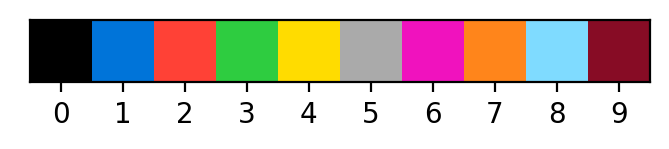

In [3]:
_cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(4, 1), dpi=200)
plt.imshow([list(range(10))], cmap=_cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

In [4]:
def plot_task(task, task_solutions, i, t):
    """    Plots the train and test pairs of a specified task,
    using same color scheme as the ARC app    """    
    
    num_train = len(task['train'])
    num_test  = len(task['test'])
    
    w=num_train+num_test
    fig, axs  = plt.subplots(2, w, figsize=(3*w ,3*2))
    plt.suptitle(f'Set #{i}, {t}:', fontsize=20, fontweight='bold', y=1)
    
    for j in range(num_train):     
        plot_one(axs[0, j], j,'train', 'input')
        plot_one(axs[1, j], j,'train', 'output')        
    
    plot_one(axs[0, j+1], 0, 'test', 'input')

    cmap = colors.ListedColormap(['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
                                  '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    answer = task_solutions
    input_matrix = answer
    axs[1, j+1].imshow(input_matrix, cmap=cmap, norm=norm)
    axs[1, j+1].grid(True, which = 'both',color = 'lightgrey', linewidth = 0.5)
    axs[1, j+1].set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
    axs[1, j+1].set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])     
    axs[1, j+1].set_xticklabels([])
    axs[1, j+1].set_yticklabels([])
    axs[1, j+1].set_title('TEST OUTPUT', color = 'green', fontweight='bold')

    fig.patch.set_linewidth(5)
    fig.patch.set_edgecolor('black')  # substitute 'k' for black
    fig.patch.set_facecolor('#dddddd')
   
    plt.tight_layout()
    plt.show()  
    
    print()
    print()

def plot_one(ax, i, train_or_test, input_or_output):
    cmap = colors.ListedColormap(['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
                                '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True, which = 'both',color = 'lightgrey', linewidth = 0.5)

    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])     
    ax.set_yticks([x-0.5 for x in range(1 + len(input_matrix))])   
    ax.set_title(train_or_test + ' ' + input_or_output, fontweight='bold')
    

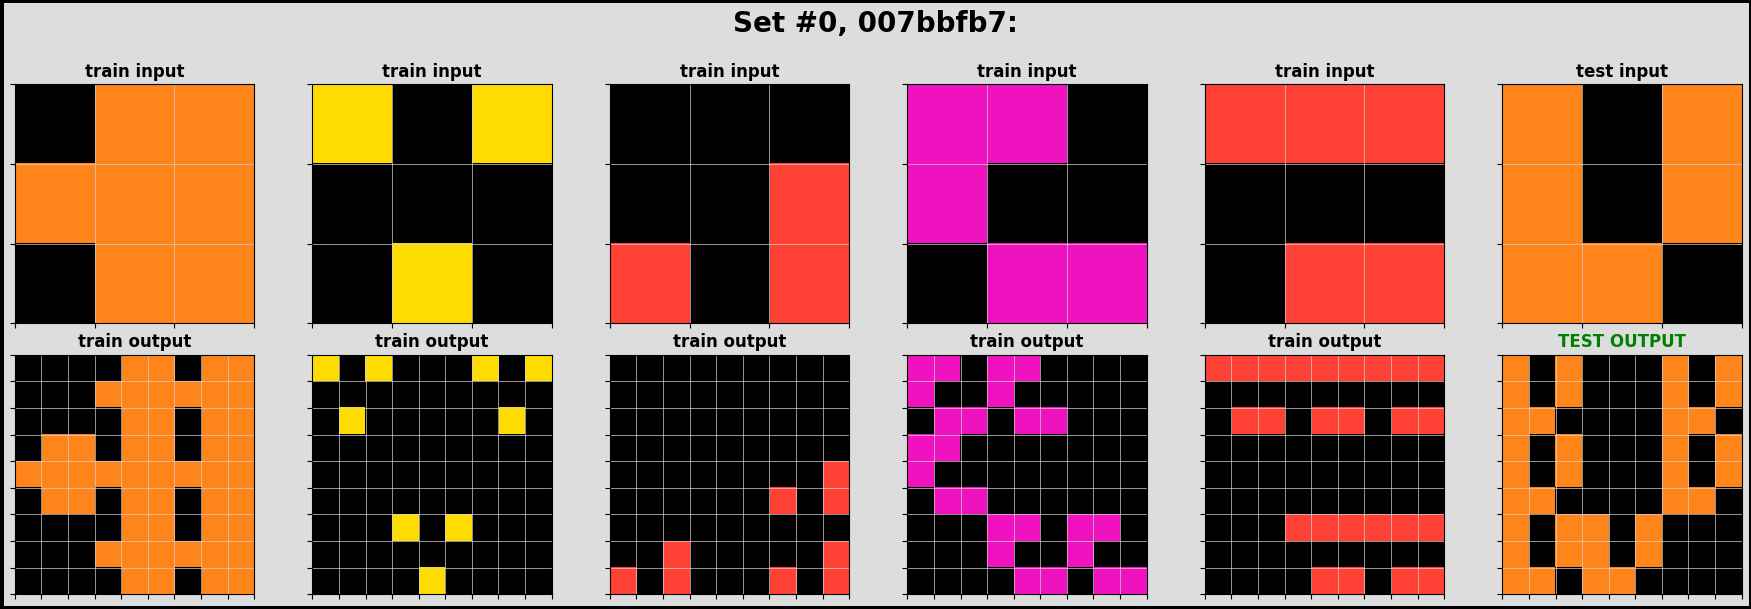

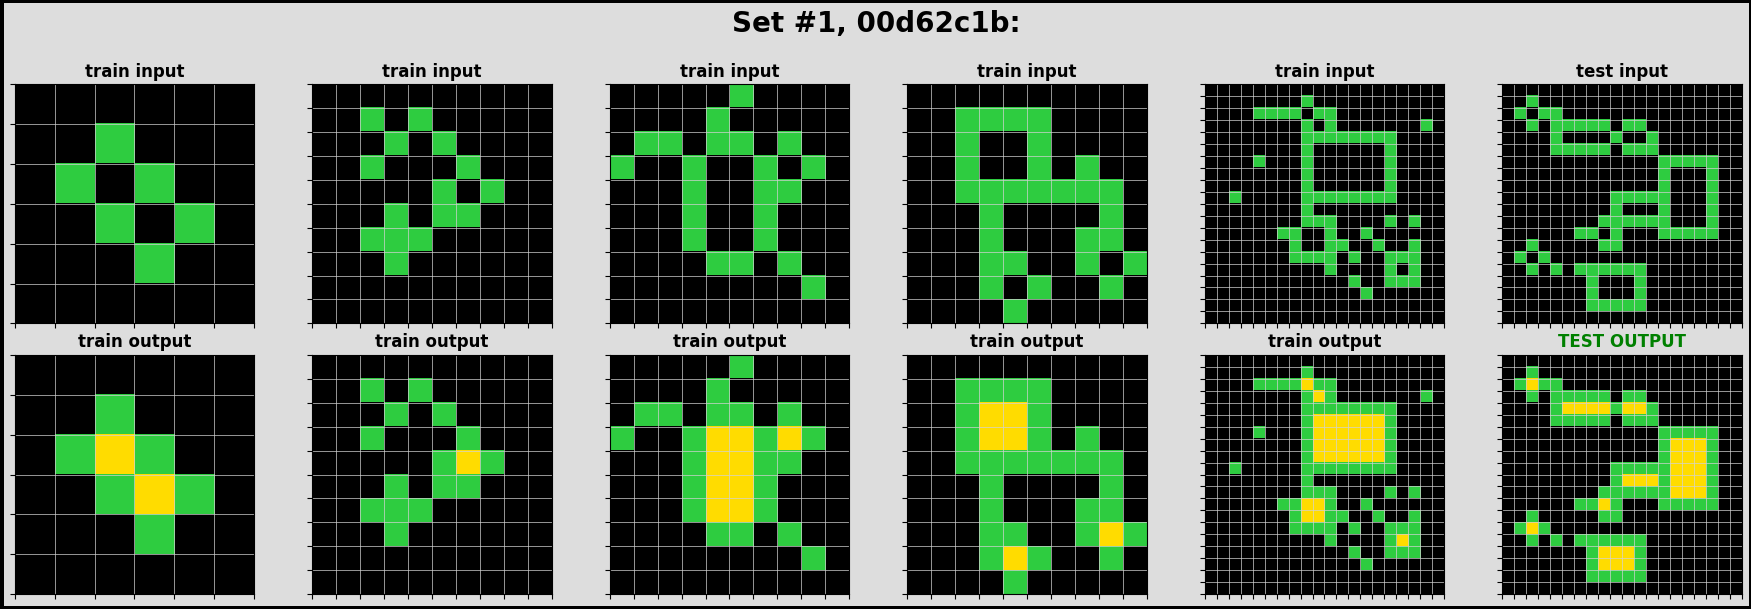

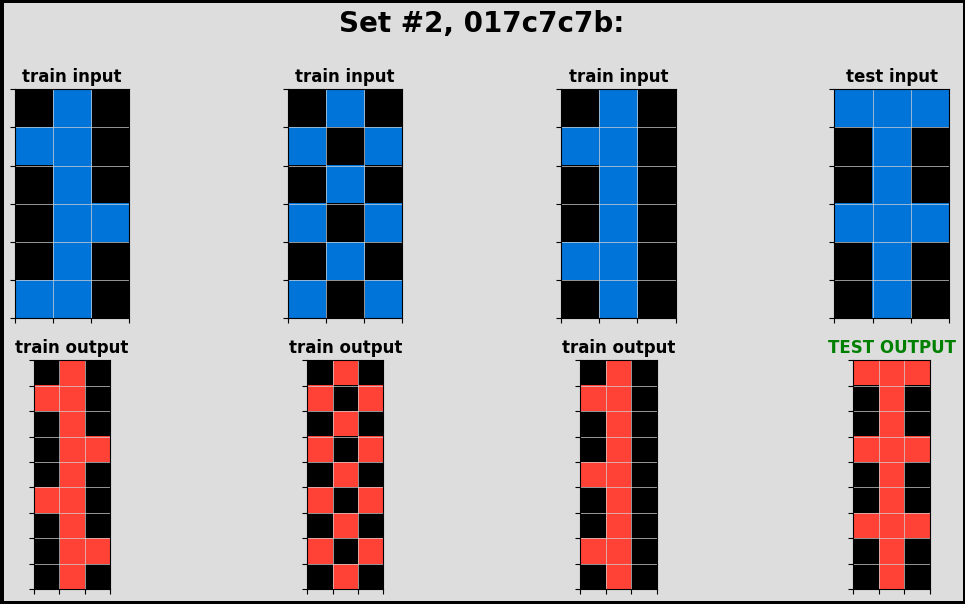

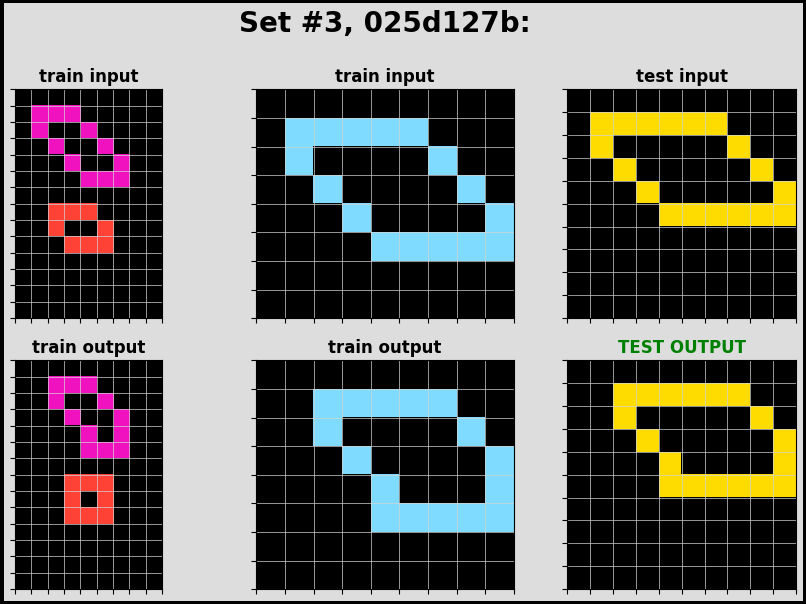

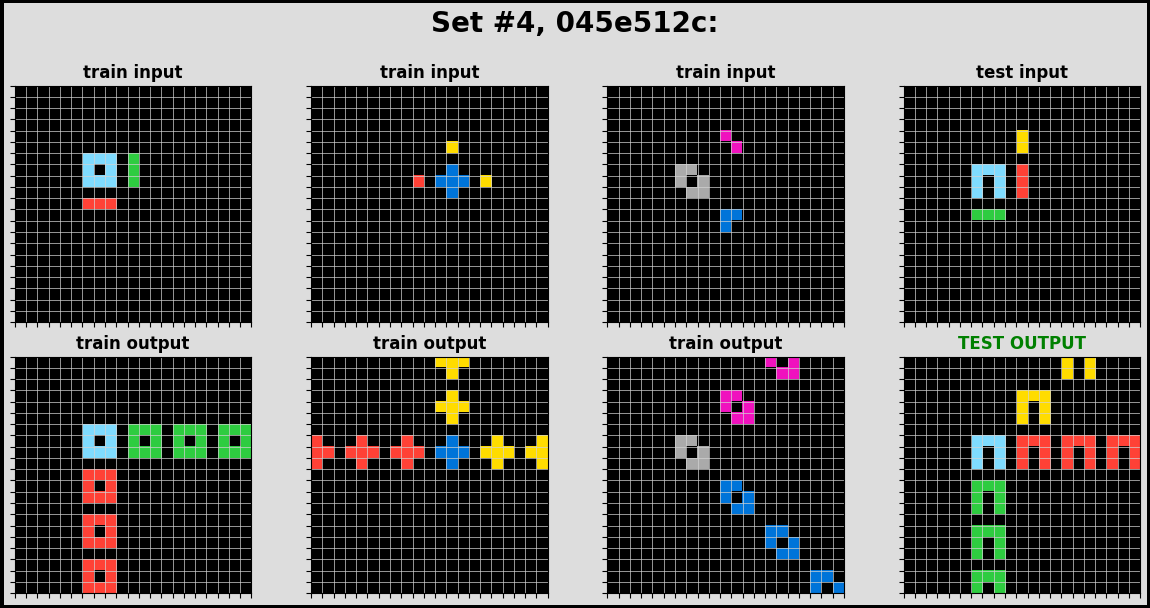

In [5]:
for i in range(0,5):
    t=list(training_challenges)[i]
    task=training_challenges[t]
    task_solution = training_solutions[t][0]
    plot_task(task,  task_solution, i, t)

Input grid shape: (3, 3), Padded input grid shape: (32, 32)
Output grid shape: (9, 9), Padded output grid shape: (32, 32)
Input grid shape: (3, 3), Padded input grid shape: (32, 32)
Output grid shape: (9, 9), Padded output grid shape: (32, 32)
Input grid shape: (3, 3), Padded input grid shape: (32, 32)
Output grid shape: (9, 9), Padded output grid shape: (32, 32)
Input grid shape: (3, 3), Padded input grid shape: (32, 32)
Output grid shape: (9, 9), Padded output grid shape: (32, 32)
Input grid shape: (3, 3), Padded input grid shape: (32, 32)
Output grid shape: (9, 9), Padded output grid shape: (32, 32)
Input grid shape: (6, 6), Padded input grid shape: (32, 32)
Output grid shape: (6, 6), Padded output grid shape: (32, 32)
Input grid shape: (10, 10), Padded input grid shape: (32, 32)
Output grid shape: (10, 10), Padded output grid shape: (32, 32)
Input grid shape: (10, 10), Padded input grid shape: (32, 32)
Output grid shape: (10, 10), Padded output grid shape: (32, 32)
Input grid shape

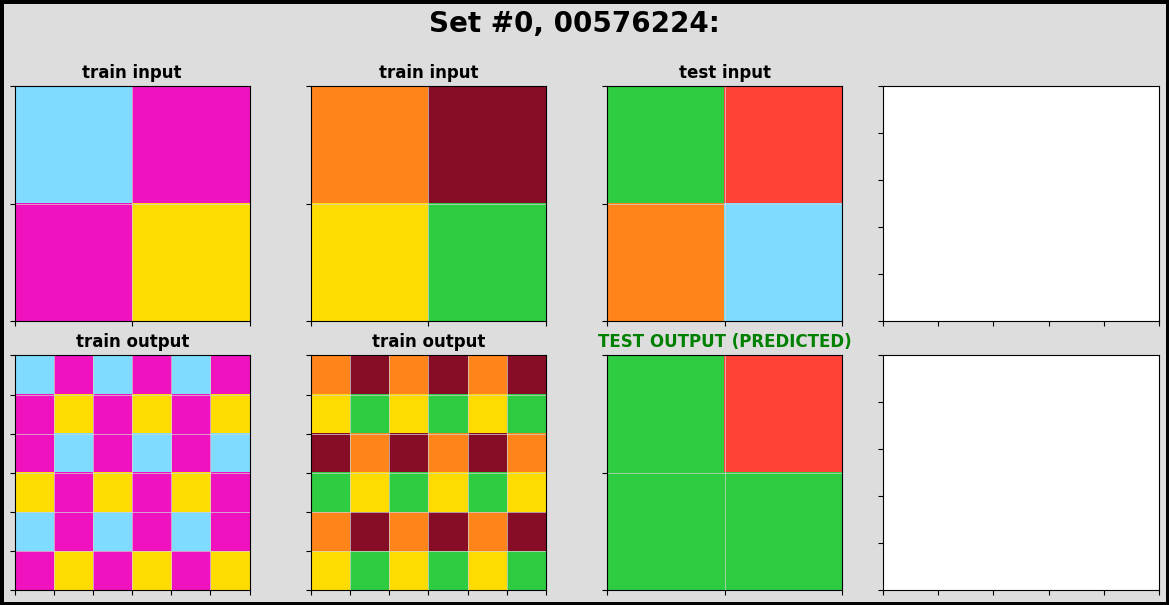


1/1 [==============================] - 0s 56ms/step


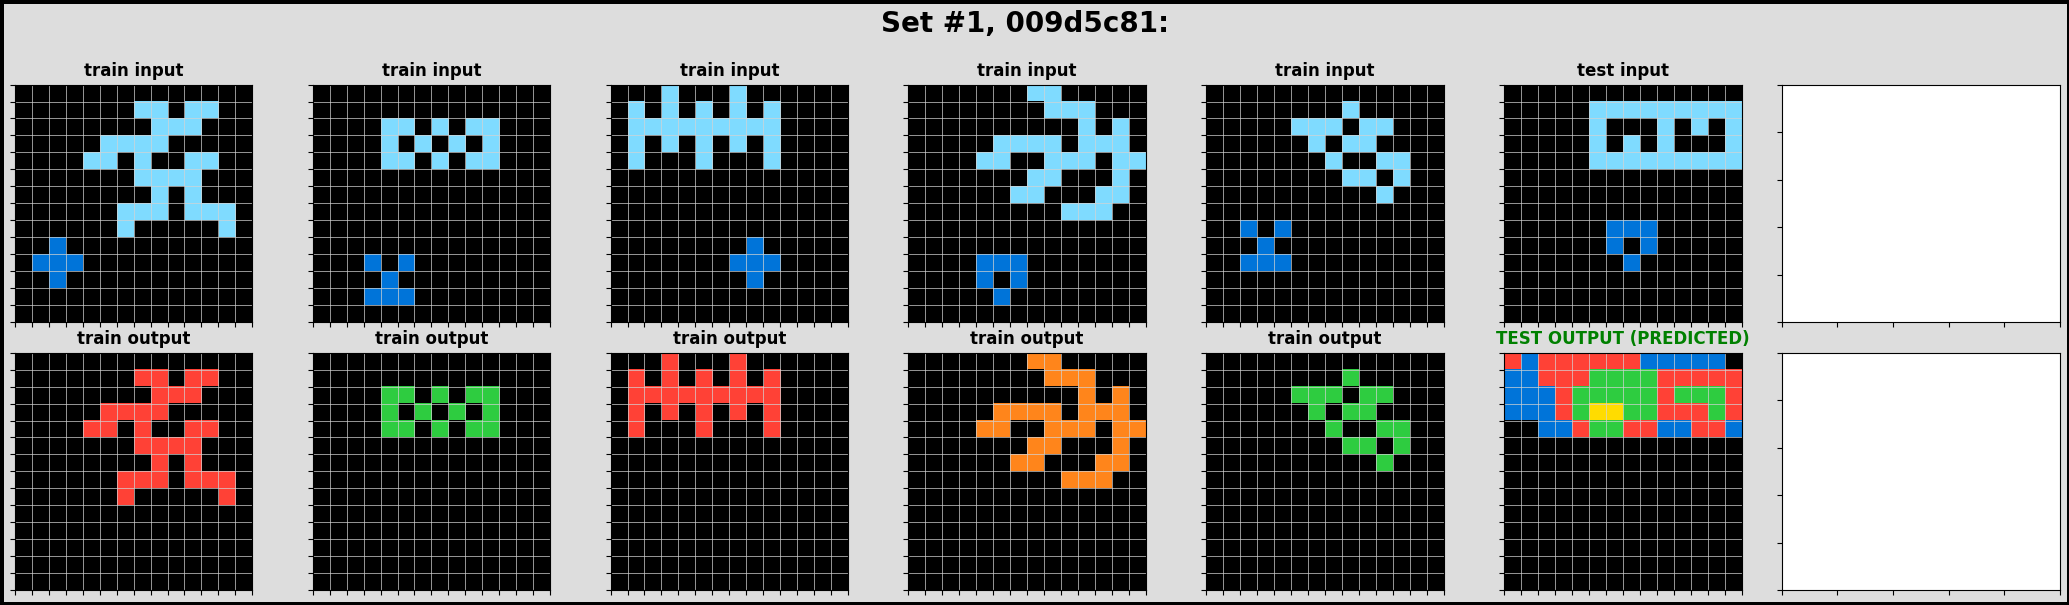


1/1 [==============================] - 0s 41ms/step


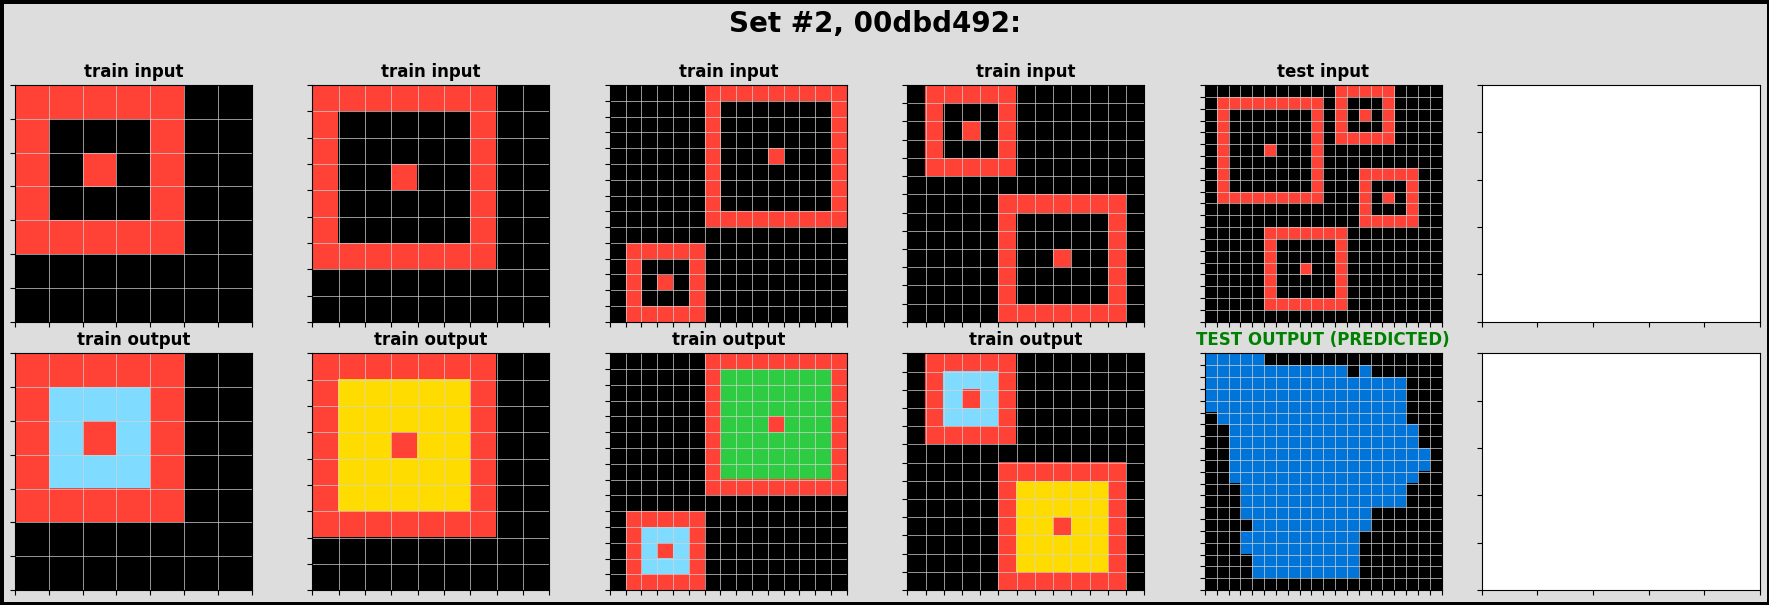


1/1 [==============================] - 0s 45ms/step


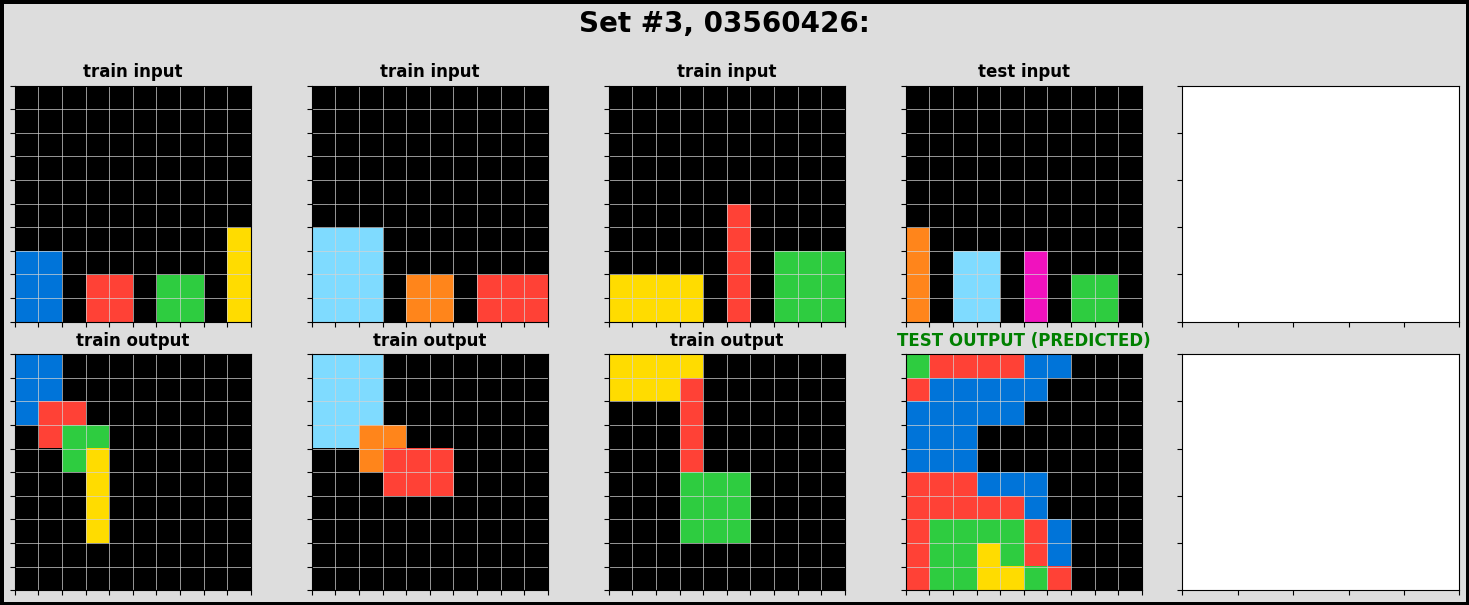


1/1 [==============================] - 0s 62ms/step


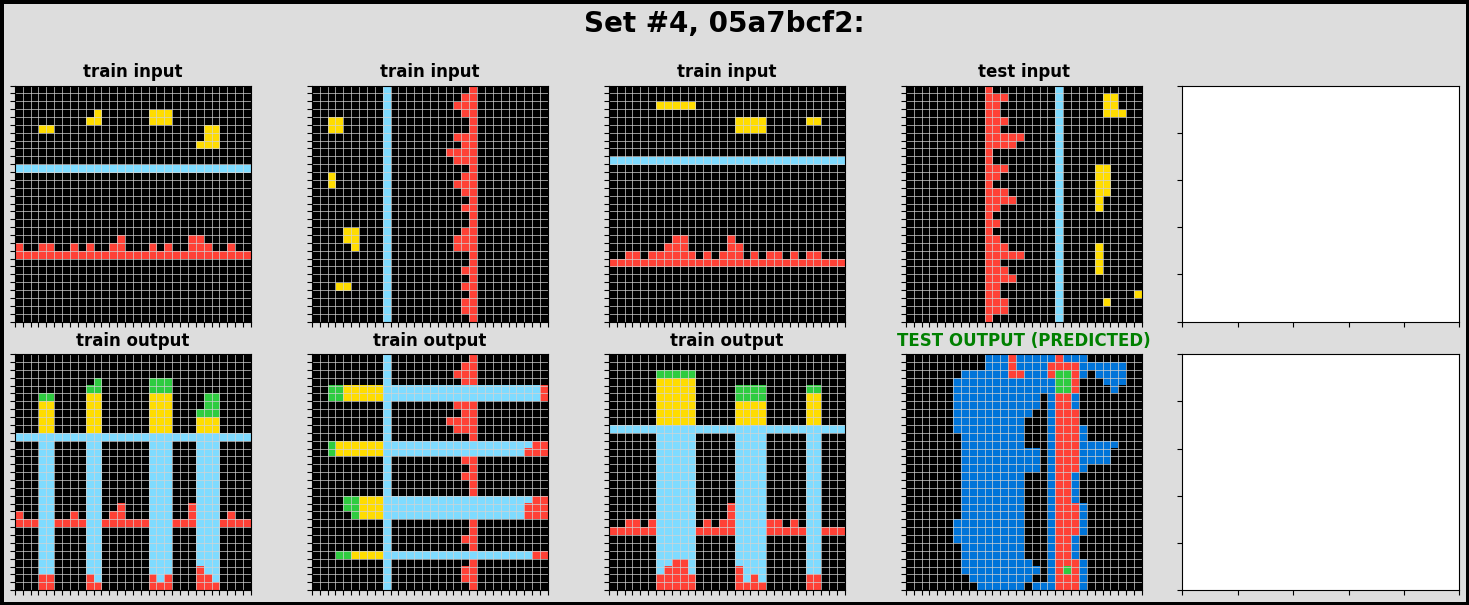

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Function to preprocess the data
def preprocess_data(challenges, solutions, target_size=(32, 32)):
    X = []
    y = []
    
    for key in challenges:
        task = challenges[key]
        solution = solutions[key]
        
        for pair in task['train']:
            input_grid = np.array(pair['input'])
            output_grid = np.array(pair['output'])
            
            pad_height_input = max(0, target_size[0] - input_grid.shape[0])
            pad_width_input = max(0, target_size[1] - input_grid.shape[1])
            
            pad_height_output = max(0, target_size[0] - output_grid.shape[0])
            pad_width_output = max(0, target_size[1] - output_grid.shape[1])
            
            # Resize input and output grids to target size
            input_grid_resized = np.pad(input_grid, [(0, pad_height_input), (0, pad_width_input)], mode='constant')
            output_grid_resized = np.pad(output_grid, [(0, pad_height_output), (0, pad_width_output)], mode='constant')
            
            # Normalize the grids by dividing by 9
            input_grid_normalized = input_grid_resized / 9.0
            output_grid_normalized = output_grid_resized / 9.0
            
            # Debugging: Print shapes before appending
            print(f"Input grid shape: {input_grid.shape}, Padded input grid shape: {input_grid_resized.shape}")
            print(f"Output grid shape: {output_grid.shape}, Padded output grid shape: {output_grid_resized.shape}")
            
            X.append(input_grid_normalized)
            y.append(output_grid_normalized)
    
    X = np.expand_dims(np.array(X, dtype=np.float32), -1)
    y = np.expand_dims(np.array(y, dtype=np.float32), -1)
    return X, y

# Load and preprocess the data
X, y = preprocess_data(training_challenges, training_solutions)

# Check the data types and shapes
print(f'X dtype: {X.dtype}, y dtype: {y.dtype}')
print(f'X shape: {X.shape}, y shape: {y.shape}')

# Define the CNN model
def build_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(UpSampling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
    
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

input_shape = X.shape[1:]
model = build_model(input_shape)
model.summary()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

# Function to predict task output
def predict_task(task, model, target_size=(32, 32)):
    test_input = np.array(task['test'][0]['input'])
    original_size = test_input.shape
    pad_height = max(0, target_size[0] - test_input.shape[0])
    pad_width = max(0, target_size[1] - test_input.shape[1])
    test_input_resized = np.pad(test_input, [(0, pad_height), (0, pad_width)], mode='constant')
    test_input_normalized = test_input_resized / 9.0
    test_input_normalized = np.expand_dims(test_input_normalized, (0, -1))
    
    predicted_output = model.predict(test_input_normalized).reshape(target_size) * 9.0
    
    # Resize back to original size
    predicted_output_resized = predicted_output[:original_size[0], :original_size[1]]
    
    return predicted_output_resized

# Function to plot tasks with predictions
def plot_task(task, task_solutions, i, t, model, target_size=(32, 32)):
    num_train = len(task['train'])
    num_test = len(task['test'])
    
    w = num_train + num_test + 1
    fig, axs = plt.subplots(2, w, figsize=(3 * w, 3 * 2))
    plt.suptitle(f'Set #{i}, {t}:', fontsize=20, fontweight='bold', y=1)
    
    for j in range(num_train):     
        plot_one(axs[0, j], task, j, 'train', 'input')
        plot_one(axs[1, j], task, j, 'train', 'output')        
    
    plot_one(axs[0, num_train], task, 0, 'test', 'input')

    # Prediction using the model
    predicted_output = predict_task(task, model, target_size)

    # Plot the predicted output
    axs[1, num_train].imshow(predicted_output, cmap=_cmap, norm=norm)
    axs[1, num_train].grid(True, which='both', color='lightgrey', linewidth=0.5)
    axs[1, num_train].set_yticks([x-0.5 for x in range(1 + len(predicted_output))])
    axs[1, num_train].set_xticks([x-0.5 for x in range(1 + len(predicted_output[0]))])     
    axs[1, num_train].set_xticklabels([])
    axs[1, num_train].set_yticklabels([])
    axs[1, num_train].set_title('TEST OUTPUT (PREDICTED)', color='green', fontweight='bold')

    fig.patch.set_linewidth(5)
    fig.patch.set_edgecolor('black')
    fig.patch.set_facecolor('#dddddd')
   
    plt.tight_layout()
    plt.show()  
    
    print()

def plot_one(ax, task, i, train_or_test, input_or_output):
    cmap = colors.ListedColormap(['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
                                  '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)

    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])     
    ax.set_yticks([x-0.5 for x in range(1 + len(input_matrix))])   
    ax.set_title(train_or_test + ' ' + input_or_output, fontweight='bold')

# Plot tasks with model predictions on the evaluation dataset
for i in range(0, 5):
    t = list(evaluation_challenges.keys())[i]
    task = evaluation_challenges[t]
    plot_task(task, None, i, t, model)
